# Estimere pi med dart
Vi vet at arealet til en sirkel med radius lik 1 er gitt ved
\begin{equation}
    A_{\text{sirkel}} = \pi 1^2 = \pi.
\end{equation}
Altså er pi det samme som arealet til en enhetssirkel! For å finne $\pi$ trenger vi derfor kun finne arealet til en sirkel med radius lik 1.

## Finne arelaet til en sirkel ved å kaste dart

<img src="bilder/sirkel_firkant_koordinat.png" width=200px align="right">

Se for deg at vi har en sirkulær blink med radius lik 1 og en firkant som akkurat når ut til kanten av blinken, litt som i figuren til høyre. Siden diameteren til sirkelen, og dermed også sidelengdene på kvadratet er lik 2, må arealet til kvadratet være lik 4.

Vi vet og at hvis vi kaster dart tilfeldig på kvadratet, så er sannsynligheten for at dartpilen treffer sirkelen gitt ved:
\begin{equation}
    P(\text{treffe sirkel}) = \frac{A_{\text{sirkel}}}{A_{\text{kvadrat}}} = \frac{\pi}{4}.
\end{equation}

Hvis vi manipulerer denne likningen litt, får vi dette uttrykket for $\pi$:
\begin{equation}
    \pi = 4P(\text{treffe sirkel}).
\end{equation}

## Estimere $P(\text{treffe sirkel})$ med Python
Men hvordan kan vi egentlig finne denne sannsynligheten? 
Vel, vi vet at sannsynligheten er gitt ved antall gunstige delt på antall mulige utfall. Da kan vi jo kaste dart veldig mange ganger og telle opp antall treff inni sirkelen! Det gir oss likningen
\begin{equation}
    P(\text{treffe sirkel}) = \frac{\text{antall gunstige utfall}}{\text{antall mulige utfall}}\approx \frac{\text{antall darts inne i sirkelen}}{\text{antall darts inne i kvadratet}}.
\end{equation}
La oss bruke Python for å simulere disse dartkastene og å telle opp antall treff! For å gjøre det trenger vi:

 * En måte å simulere tilfeldige dartkast i kvadratet
 * En måte å sjekke om vi traff blinken
 * Kode for å kaste dart mange ganger og telle hvor mange ganger vi traff blinken
 
La oss starte med å importere noen nyttige funksjoner fra `pylab`.

In [1]:
from pylab import uniform, sqrt, plot, xlim, ylim, axis, show

### Kode for å simulere dartkast

Når vi kaster en dartpil så lander den ett eller annet tilfeldig sted på enhetskvadratet. For å simulere dette kan vi lage en funksjon som trekker et x-koordinat tilfeldig mellom -1 og 1 og et y-koordinat tilfeldig mellom -1 og 1. Dette kan vi gjøre med `uniform`-funksjonen i pylab

In [2]:
def kast_dart():
    """Kast en tilfeldig dart og returner koordinatene til kastet (x og y skal være mellom -1 og 1)
    """
    x_koordinat = uniform(-1, 1)
    y_koordinat = uniform(-1, 1)
    
    return x_koordinat, y_koordinat

### Visualisere et dartkast

Det er ofte nyttig å teste koden underveis og visualisere koderesultatene. Under er litt kode for å plotte hvor dartkastet vårt lander inne i enhetskvadratet.

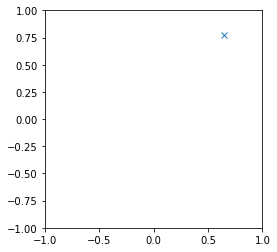

In [5]:
dart_x, dart_y = kast_dart()

plot(dart_x, dart_y, 'x')
axis("square")  # Pass på at x-aksen og y-aksen har samme målestokk
xlim(-1, 1)  # Pass på at x-aksen går fra -1 til 1 (bredden til enhetskvadratet)
ylim(-1, 1)  # Pass på at y-aksen går fra -1 til 1 (høyden til enhetskvadratet)

show()

## Sjekke at vi treffer blinken

<img src="bilder/dartkast.png" width=200px align="right">

Neste steg i simuleringen vår blir å sjekke om vi traff blinken.  Vi trenger altså å sjekke om vi er innenfor enhetssirkelen. For at et punkt skal være innenfor enhetssirkelen må avstanden mellom origo og punktet være mindre enn 1. 

Vi ser av figuren til høyre at vi kan tegne opp en rettvinklet trekant slik at avstanden til origo er gitt ved hypotenusen til trekanten og x- og y- koordinatene til dartkastet tilsvarer første og andre katet. Da kan vi bruke Pytagoras-setning til å finne avstanden. 

Vi starter med å lage en funksjon for å regne ut hypotenusen til en rettvinklet trekant. Pytagoras setning sier at:

\begin{equation}
    \text{Hypotenus} = \sqrt{\text{Katet}_1^2 + \text{Katet}_2^2}
\end{equation}

Dette kan vi skrive som en funksjon i Python:

In [10]:
def finn_hypotenus(katet1, katet2):
    """Tar inn katetene i en rettvinklet trekant og returnerer lengden til hypotenus
    """
    return sqrt(katet1**2 + katet2**2)

Nå kan vi bruke `finn_hypotenus` funksjonen til å lage en betingelse for om darten traff inne i enhetssirkelen. Dette kan vi bruke til å lage en funksjon som sjekker om vi traff eller ikke:


In [11]:
def traff_blinken(dart_x, dart_y):
    """Tar inn koordinater til dartkast returnerer True dersom darten traff og False dersom den ikke traff
    """
    avstand_origo = finn_hypotenus(dart_x, dart_y)
    if avstand_origo < 1:
        return True
    else:
        return False

### Bedre visualisering av dartkast

Nå som vi har en måte å teste om et dartkast traff blinken eller ei, kan vi visualisere det ved å tegne dartkastet rødt (utenfor blinken) eller grønt (innenfor blinken).

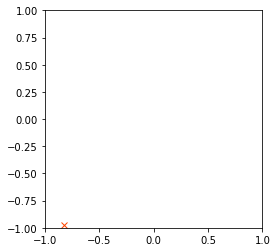

In [23]:
dart_x, dart_y = kast_dart()

axis("square")  # Pass på at x-aksen og y-aksen har samme målestokk
xlim(-1, 1)  # Pass på at x-aksen går fra -1 til 1 (bredden til enhetskvadratet)
ylim(-1, 1)  # Pass på at y-aksen går fra -1 til 1 (høyden til enhetskvadratet)

if traff_blinken(dart_x, dart_y):
    plot(dart_x, dart_y, 'x', color='forestgreen')
else:
    plot(dart_x, dart_y, 'x', color='orangered')

Hvis vi kjører koden over mange ganger, ser vi at dartkastene blir grønne om de er innenfor enhetssirkelen og røde om de er utenfor. Altså ser det ut som om koden kjører. Da er vi klare for å estimere pi!

PS. over brukte vi fargene `forestgreen` og `orangered`, men du kan bruke hvilke som helst CSS-kompatible farger. Du finner en liste over alle slike navngitte farger her: https://www.w3schools.com/cssref/css_colors.asp. Du kan også bruke hex-farger hvis du vil det (altså farger på formatet `#eb4034`), og da kan du hente farger fra et standard fargevalgprogram, slik som Google sin fargevelger: https://www.google.com/search?q=color+picker.

## Mange dartkast for å estimere pi

Vi starter med kode som kaster dart 100 000 ganger, teller opp antall ganger vi traff blinken, og bruker det for å estimere sannsynligheten for å treffe blinken. Basert på dette, kan vi som vi så tidligere, estimere pi!

In [24]:
antall_kast = 100000
antall_treff = 0

for kast in range(antall_kast):
    # Kast en dart
    dart_x, dart_y = kast_dart()
    # Sjekk treff
    if traff_blinken(dart_x, dart_y):
        antall_treff += 1
        
estimert_sannsynlighet = antall_treff/antall_kast
estimert_pi = 4*estimert_sannsynlighet

print(f"Antall kast: {antall_kast}")
print(f"Antall treff: {antall_treff}")
print(f"Estimert sannsynlighet: {estimert_sannsynlighet}")
print(f"Estimert pi: {estimert_pi}")

Antall kast: 100000
Antall treff: 78497
Estimert sannsynlighet: 0.78497
Estimert pi: 3.13988


Igjen kan det være nyttig å visualisere dartkastene våre. Men det kan ta lang tid å tegne opp 100 000 dartkast, så nå kaster vi bare 1000 dart istedenfor.

Antall kast: 1000
Antall treff: 782
Estimert sannsynlighet: 0.782
Estimert pi: 3.128


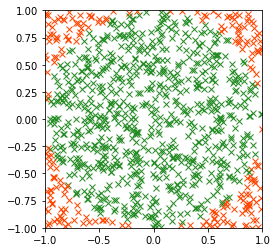

In [25]:
axis("square")
xlim(-1, 1)
ylim(-1, 1)

antall_kast = 1000
antall_treff = 0

for kast in range(antall_kast):
    dart_x, dart_y = kast_dart()
    if traff_blinken(dart_x, dart_y):
        plot(dart_x, dart_y, 'x', color='forestgreen')
        antall_treff += 1
    else:
        plot(dart_x, dart_y, 'x', color='orangered')

estimert_sannsynlighet = antall_treff/antall_kast
estimert_pi = 4*estimert_sannsynlighet

print(f"Antall kast: {antall_kast}")
print(f"Antall treff: {antall_treff}")
print(f"Estimert sannsynlighet: {estimert_sannsynlighet}")
print(f"Estimert pi: {estimert_pi}")

## Glidebryter for å velge antall kast

In [26]:
from ipywidgets import interact_manual
def estimer_pi(antall_kast):
    axis("square")
    xlim(-1, 1)
    ylim(-1, 1)

    antall_treff = 0

    for kast in range(antall_kast):
        dart_x, dart_y = kast_dart()
        if traff_blinken(dart_x, dart_y):
            plot(dart_x, dart_y, 'x', color='forestgreen')
            antall_treff += 1
        else:
            plot(dart_x, dart_y, 'x', color='orangered')

    estimert_sannsynlighet = antall_treff/antall_kast
    estimert_pi = 4*estimert_sannsynlighet

    print(f"Antall kast: {antall_kast}")
    print(f"Antall treff: {antall_treff}")
    print(f"Estimert sannsynlighet: {estimert_sannsynlighet}")
    print(f"Estimert pi: {estimert_pi}")

interact_manual(estimer_pi, antall_kast=(1, 10000))

interactive(children=(IntSlider(value=5000, description='antall_kast', max=10000, min=1), Button(description='…

<function __main__.estimer_pi(antall_kast)>